In [16]:
import re
import os
from nltk import sent_tokenize


def simple_preprocess_manual(text, min_len=2, max_len=15):
    text = text.lower()
    text = re.sub(r"[^a-z\s]", " ", text)
    tokens = text.split()
    tokens = [tok for tok in tokens if min_len <= len(tok) <= max_len]
    return tokens

In [17]:
story = []
for filename in os.listdir("data"):
    with open(os.path.join("data", filename), encoding="utf-8", errors="ignore") as f:
        corpus = f.read()
        raw_sent = sent_tokenize(corpus)

        for sent in raw_sent:
            tokens = simple_preprocess_manual(sent)
            story.append(tokens)

In [71]:
story[2]

['do', 'the', 'dead', 'frighten', 'you']

In [18]:
# flatten list of sentences into one big word list
text = [word for sentence in story for word in sentence]

MAX_WORDS = 10000

text = text[:MAX_WORDS]

In [19]:
# --- Build vocabulary ---
vocab = list(set(text))
word2idx = {w: i for i, w in enumerate(vocab)}
idx2word = {i: w for w, i in word2idx.items()}

In [20]:
vocab

['pup',
 'together',
 'reared',
 'waking',
 'that',
 'eyed',
 'loved',
 'distracted',
 'point',
 'prepare',
 'frowning',
 'played',
 'else',
 'cruel',
 'whimpery',
 'abandoned',
 'dawned',
 'best',
 'sing',
 'and',
 'follows',
 'acquiescence',
 'of',
 'called',
 'double',
 'again',
 'forgotten',
 'brother',
 'suspected',
 'desperate',
 'hand',
 'help',
 'hard',
 'transfixed',
 'sit',
 'rode',
 'track',
 'watching',
 'bundle',
 'knee',
 'campsite',
 'lost',
 'awaiting',
 'making',
 'forget',
 'lords',
 'wardrobe',
 'handsome',
 'courage',
 'recall',
 'mad',
 'shape',
 'heart',
 'remember',
 'smiled',
 'uncle',
 'lay',
 'thinking',
 'approach',
 'piece',
 'fires',
 'solemnly',
 'hilt',
 'distant',
 'doubt',
 'tore',
 'bush',
 'kicking',
 'walk',
 'dismount',
 'heartbeat',
 'kingsroad',
 'sunset',
 'dismay',
 'prologue',
 'halted',
 'second',
 'brothers',
 'flat',
 'tongue',
 'change',
 'away',
 'tugged',
 'wrestled',
 'ours',
 'but',
 'feel',
 'tree',
 'promised',
 'deserve',
 'say',
 'h

In [22]:
import numpy as np


V = len(vocab)  # vocab size
D = 50  # embedding dimension

# --- One hot matrix ---
onehot = np.eye(V)

window = 2
training_data = []

# --- Build context-target pairs ---
for i in range(window, len(text) - window):
    target = word2idx[text[i]]
    context = [
        word2idx[text[i - 2]],
        word2idx[text[i - 1]],
        word2idx[text[i + 1]],
        word2idx[text[i + 2]],
    ]
    training_data.append((context, target))

print("Training samples:", len(training_data))
print("Vocab size:", V)

Training samples: 9996
Vocab size: 2021


In [23]:
# CBOW Architecture (Forward + Backward)

# --- Initialize Weights ---
W1 = np.random.randn(V, D) * 0.01
W2 = np.random.randn(D, V) * 0.01
lr = 0.05
epochs = 1

def softmax(x):
    e = np.exp(x - np.max(x))
    return e / e.sum()

In [24]:
# Training (Gradient Descent)
for epoch in range(epochs):
    loss = 0

    for context, target in training_data:
        # ---- FORWARD PASS ----
        x = np.mean(onehot[context], axis=0)  # average one-hot
        h = x @ W1  # hidden vector (1×D)
        y = softmax(h @ W2)  # output scores

        # ---- LOSS ----
        y_true = onehot[target]
        loss -= np.log(y[target] + 1e-7)

        # ---- BACKWARD PASS ----
        e = y - y_true  # output error (1×V)

        dW2 = np.outer(h, e)  # (D×V)
        dW1 = np.outer(x, (W2 @ e))  # (V×D)

        # ---- UPDATE ----
        W2 -= lr * dW2
        W1 -= lr * dW1

    print(f"Epoch {epoch+1}/{epochs} - Loss: {loss:.4f}")

Epoch 1/1 - Loss: 75985.8904


In [25]:
# Embedding matrix (V × D)
embeddings = W1

np.save("cbow_embeddings.npy", embeddings)

print("Saved CBOW embeddings!")

Saved CBOW embeddings!


In [26]:
def cosine(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))


word1 = "king"
word2 = "queen"

print(
    f"Similarity({word1}, {word2}) = {cosine(embeddings[word2idx[word1]], embeddings[word2idx[word2]])}"
)

Similarity(king, queen) = 0.4758079449191003


In [11]:
word2idx

{'pup': 0,
 'together': 1,
 'reared': 2,
 'waking': 3,
 'that': 4,
 'eyed': 5,
 'loved': 6,
 'distracted': 7,
 'point': 8,
 'prepare': 9,
 'frowning': 10,
 'played': 11,
 'else': 12,
 'cruel': 13,
 'whimpery': 14,
 'abandoned': 15,
 'dawned': 16,
 'best': 17,
 'sing': 18,
 'and': 19,
 'follows': 20,
 'acquiescence': 21,
 'of': 22,
 'called': 23,
 'double': 24,
 'again': 25,
 'forgotten': 26,
 'brother': 27,
 'suspected': 28,
 'desperate': 29,
 'hand': 30,
 'help': 31,
 'hard': 32,
 'transfixed': 33,
 'sit': 34,
 'rode': 35,
 'track': 36,
 'watching': 37,
 'bundle': 38,
 'knee': 39,
 'campsite': 40,
 'lost': 41,
 'awaiting': 42,
 'making': 43,
 'forget': 44,
 'lords': 45,
 'wardrobe': 46,
 'handsome': 47,
 'courage': 48,
 'recall': 49,
 'mad': 50,
 'shape': 51,
 'heart': 52,
 'remember': 53,
 'smiled': 54,
 'uncle': 55,
 'lay': 56,
 'thinking': 57,
 'approach': 58,
 'piece': 59,
 'fires': 60,
 'solemnly': 61,
 'hilt': 62,
 'distant': 63,
 'doubt': 64,
 'tore': 65,
 'bush': 66,
 'kicking

In [27]:
# pairs = [
#     ("man", "woman"),
#     ("king", "queen"),
#     ("life", "death"),
#     ("bone", "waist"),
#     ("kid", "child"),
# ]
pairs = [
    ("lord", "lady"),
    ("king", "queen"),
    ("north", "winterfell"),
    ("wall", "night"),
    ("throne", "crown"),
    ("king", "throne"),
    ("lord", "command"),
    ("army", "battle"),
    ("winter", "north"),
    # Object / place pairs
    ("dragon", "fire"),
    ("sword", "steel"),
    ("castle", "tower"),
    ("river", "bridge"),
    ("ship", "sea"),
    ("horse", "rider"),
    ("snow", "ice"),
    # Oppositional semantic pairs (good for similarity tests)
    ("life", "death"),
    ("love", "war"),
    ("night", "day"),
    ("north", "south"),
    ("king", "traitor"),
    ("friend", "enemy"),

    # high similarity
    ("jon", "arya"),  # Stark siblings → high similarity
    ("cersei", "jaime"),  # same contexts
    ("tyrion", "cersei"),  # medium similarity
    ("dragon", "queen"),  # Daenerys context
    ("winterfell", "north"),  # location close
    ("throne", "king"),  # context similar
]
for w1, w2 in pairs:
    if w1 in word2idx and w2 in word2idx:
        sim = cosine(embeddings[word2idx[w1]], embeddings[word2idx[w2]])
        print(f"{w1:10s} {w2:10s}  similarity = {sim:.4f}")

lord       lady        similarity = 0.3349
king       queen       similarity = 0.4758
north      winterfell  similarity = 0.0685
wall       night       similarity = 0.3927
king       throne      similarity = 0.5946
lord       command     similarity = 0.0653
winter     north       similarity = 0.1136
dragon     fire        similarity = 0.3966
sword      steel       similarity = 0.3975
ship       sea         similarity = 0.0704
snow       ice         similarity = 0.0126
life       death       similarity = 0.0532
night      day         similarity = 0.3186
north      south       similarity = 0.0597
friend     enemy       similarity = -0.1740
jon        arya        similarity = 0.0048
dragon     queen       similarity = 0.4883
winterfell north       similarity = 0.0685
throne     king        similarity = 0.5946


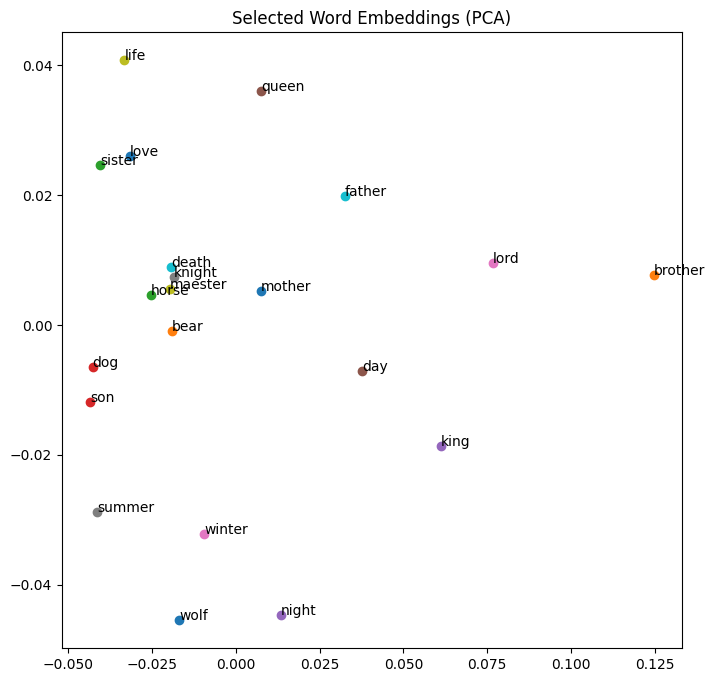

In [29]:
words = ["love", "hate", "king", "queen", "lord", "night", "day", "death", "life"]
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

words = ["wolf", "lion", "bear", "horse", "dog", "cat", "eagle", "king", "queen", "lord", "knight", "soldier", "maester", "servant", "father", "mother", "brother", "sister", "son", "daughter", "night", "day", "winter", "summer", "spring", "autumn", "life", "death", "love", "hate", "war", "peace"]
selected = [w for w in words if w in word2idx]
idxs = [word2idx[w] for w in selected]

emb = embeddings[idxs]

pca = PCA(n_components=2)
reduced = pca.fit_transform(emb)

plt.figure(figsize=(8, 8))
for i, word in enumerate(selected):
    plt.scatter(reduced[i, 0], reduced[i, 1])
    plt.text(reduced[i, 0], reduced[i, 1], word)

plt.title("Selected Word Embeddings (PCA)")
plt.show()

In [30]:
pairs = [
    ("man", "woman"),
    ("king", "queen"),
    ("prince", "princess"),
    ("lord", "lady"),
    ("queen", "princess"),
    ("king", "crown"),
    ("lady", "throne"),
    ("man", "throne"),
]

for w1, w2 in pairs:
    if w1 in word2idx and w2 in word2idx:
        v1 = embeddings[word2idx[w1]]
        v2 = embeddings[word2idx[w2]]
        sim = cosine(v1, v2)
        print(f"{w1:10s} {w2:10s} similarity = {sim:.4f}")


man        woman      similarity = 0.7255
king       queen      similarity = 0.4758
prince     princess   similarity = 0.1693
lord       lady       similarity = 0.3349
queen      princess   similarity = 0.1718
lady       throne     similarity = 0.2805
man        throne     similarity = 0.6179


# CBOW Sentence Classifier

In [31]:
finance_sentences = [
    "The bank approved the loan",
    "The stock market crashed today",
    "I need to deposit money",
    "The investment portfolio grew quickly",
    "She took a mortgage from the bank",
]

nature_sentences = [
    "The river flows through the forest",
    "Leaves were falling from the trees",
    "The mountain is covered with snow",
    "Birds are singing near the lake",
    "The storm destroyed the valley",
]

X = finance_sentences + nature_sentences
y = [1]*len(finance_sentences) + [0]*len(nature_sentences)   # 1=finance, 0=nature


In [32]:
import numpy as np

def cbow_sentence_embedding(sentence):
    words = sentence.lower().split()
    vecs = []
    for w in words:
        if w in word2idx:
            vecs.append(embeddings[word2idx[w]])
    if len(vecs) == 0:
        return np.zeros(embeddings.shape[1])
    return np.mean(vecs, axis=0)


In [33]:
X_cbow = np.array([cbow_sentence_embedding(s) for s in X])
y = np.array(y)


In [37]:
X

['The bank approved the loan',
 'The stock market crashed today',
 'I need to deposit money',
 'The investment portfolio grew quickly',
 'She took a mortgage from the bank',
 'The river flows through the forest',
 'Leaves were falling from the trees',
 'The mountain is covered with snow',
 'Birds are singing near the lake',
 'The storm destroyed the valley']

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_cbow, y, test_size=0.3, random_state=42)

clf_cbow = LogisticRegression()
clf_cbow.fit(X_train, y_train)
pred = clf_cbow.predict(X_test)
acc_cbow = accuracy_score(y_test, pred)

print("CBOW classifier accuracy:", acc_cbow)


CBOW classifier accuracy: 0.3333333333333333
